In [1]:
# y3gold_astrometry

This notebook is intended to be used to create Y3 Gold paper plots: astrometry

In [41]:
%matplotlib inline
import os,sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import fitsio
#from astropy.io import fits
#from astropy.io.fits.hdu.hdulist import HDUList
import healpy as hp
from descolors import BAND_COLORS
import warnings
warnings.filterwarnings('ignore')
workdir = '/Users/nsevilla/y3gold-paper/'
datadir = '/Volumes/NO NAME/'
figsdir = '/Users/nsevilla/y3gold-paper/figs/'

In [3]:
#load Alex's skymap utilities
import skymap
from skymap import Skymap,McBrydeSkymap,OrthoSkymap
from skymap import SurveySkymap,SurveyMcBryde,SurveyOrtho
from skymap import DESSkymap

SKYMAPS = [Skymap,McBrydeSkymap,OrthoSkymap]
SURVEYS = [SurveySkymap,SurveyMcBryde,SurveyOrtho]

NSIDE = 256

In [5]:
plt.rcParams['axes.labelsize'] = 30
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['xtick.labelsize'] = 30
plt.rcParams['ytick.labelsize'] = 30
plt.rcParams['lines.linewidth'] = 3

In [9]:
import scipy.optimize
def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2./(2.*sigma**2))

### Maps

In [17]:
# we will use the matched catalogs from Alex and William
# https://cdcvs.fnal.gov/redmine/projects/des-y3/wiki/Y3A2_Comparison_to_Gaia_DR2
NSIDE = 256

In [15]:
plt.figure(figsize=(25,25))
Y3DR2_astro_residual_map = fitsio.read(datadir+'median_angsep_old.fits',ext=1)['I'].ravel()

<Figure size 1800x1800 with 0 Axes>

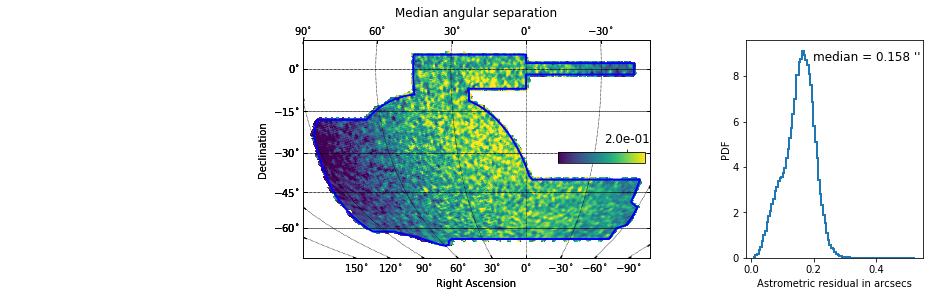

In [43]:
fig = plt.figure(figsize=(16.,4.))
gridspec = plt.GridSpec(1,3,wspace=1.02)
smap = DESSkymap()
smap.draw_hpxmap(Y3DR2_astro_residual_map,xsize=1000)
smap.draw_inset_colorbar(fontsize=12,ticks=[0,0.2])
smap.draw_des()
plt.title('Median angular separation', y=1.08)
ax2 = plt.Subplot(fig,gridspec[2])
fig.add_subplot(ax2)
plt.sca(ax2)
plt.xlabel('Astrometric residual in arcsecs')
plt.ylabel('PDF',labelpad=1)
n,b,p = plt.hist(Y3DR2_astro_residual_map[Y3DR2_astro_residual_map>0],normed=True,histtype='step',bins=100,linewidth=2)
p0 = [Y3DR2_astro_residual_map[Y3DR2_astro_residual_map>0].size, np.median(Y3DR2_astro_residual_map[Y3DR2_astro_residual_map>0]), np.std(Y3DR2_astro_residual_map[Y3DR2_astro_residual_map>0])]
text1 = 'median = %.3f \'\'' % p0[1] 
ax2.annotate(text1,(0.38,0.95),xycoords='axes fraction',ha='left',va='top',size=12)
plt.savefig(figsdir+'y3gold_astrometry_residuals.png')
